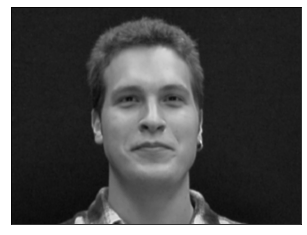

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/Users/praladneupane/Documents/Third_Semester/695/projects/Deepfake/Dataset/images/real/90.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
# to hide tick values on X and Y axis
plt.xticks([]), plt.yticks([])  
plt.show()

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [1]:

#Importing the neural network used to detect faces
from mtcnn import MTCNN
detector = MTCNN()

#You will need to install tensorflow and keras to use mtcnn.
#Type 'pip install mtcnn' and 'pip install tensorflow'

#Function detect a face, convert it to RGB, and crop the image around the face
def detectFace(image, boxScale = 0.15):
    RGBImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detection = detector.detect_faces(RGBImage) #Using the detect_faces function in the MTCNN library
    #Putting a box around the face
    if len(detection) > 0:
        squareBox = detection[0]['box']
        x = int(squareBox[0] - boxScale * sqaureBox[2])
        y = int(squareBox[1] - boxScale * sqaureBox[3])
        w = int(squareBox[2] + boxScale * squareBox[2] * 2)
        h = int(squareBox[3] + boxScale * squareBox[3] * 2)
        
        #Cropping the image
        return image[y:y+h, x:x+w, :].copy()
    return None

#Function to detect the faces and save the cropped images to disk
def detectAndSave(videoName, boxScale = 0.15, limitFaces = -1, saveFaces = True):
    detector = MTCNN()
    faces = list()
    # add '_face' at the end to differentiate face images
    faceName = os.path.splitext(videoName)[0] + '_face'
    
    #Reading the frames like we did before but this time only saving the faces instead of the entire frames
    capture = cv2.VideoCapture(videoName)
    numFrames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    for frameNum in range(numFrames):
        #Loop until the limit is no longer -1
        if limitFaces != -1 and frameNum >= limitFaces:
            break
        capture.set(cv2.CAP_PROP_POS_FRAMES, frameNum)
        ret, frame = capture.read()
        #Using our detect_face function above
        face = detectFace(frame, boxScale=boxScale)
        if face is not None:
            faces.append(face)
            if saveFaces:
                cv2.imwrite(faceName + '_' + str(frameNum) + '.jpg', face)
    return faces


Using TensorFlow backend.
